<a href="https://colab.research.google.com/github/nikitabelii/Data-Science/blob/main/ProblemSet2/ProblemSet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data, color, io
import IPython

import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=6beb3b86c678cd5c9f7cdbd2d0e03966dfb38ce26e12c7b0e4d0de19580d2ace
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import imageio as io

In [ ]:
# Load an RGB image of your choice from a URL

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

<ipython-input-41-b1cc0447b322>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("https://th.bing.com/th/id/OIP.HLuY60jzx5puuKjbqmWRRwHaEK?pid=ImgDet&rs=1")


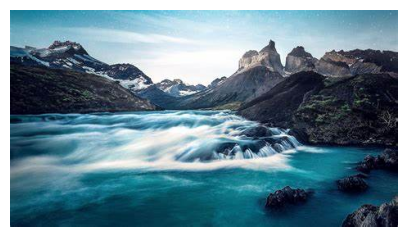

In [ ]:
image = io.imread("https://th.bing.com/th/id/OIP.HLuY60jzx5puuKjbqmWRRwHaEK?pid=ImgDet&rs=1")

plot(image)

In [ ]:
image.shape

(266, 474, 3)

In [ ]:
#Resize the image to 224x224

#(it didn't show the image with np.resize, so I used cv2)

In [ ]:
import cv2

# Load the input image
input_image = cv2.imread('input_image.jpg')

# Specify the new size (width, height)
new_size = (224, 224)

# Resize the image
resized_image = cv2.resize(image, new_size)

# Save the resized image
cv2.imwrite('output_image.jpg', resized_image)
image = resized_image

In [ ]:
image.shape

(224, 224, 3)

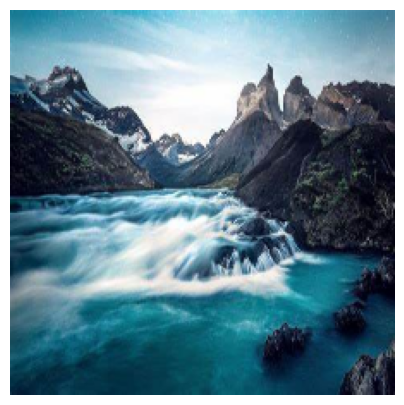

In [ ]:
plot(resized_image)

In [ ]:
#Show a grayscale copy

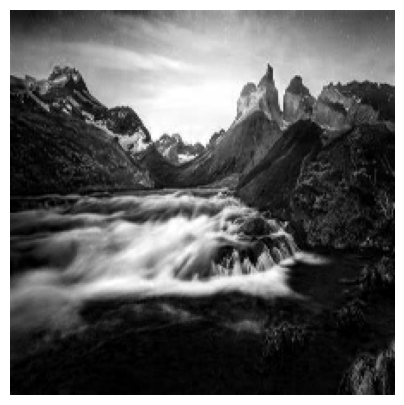

In [ ]:
image = image[:,:,0]
image = image.astype(float)
image /= 255.0
plot(image)

In [ ]:
image.shape

(224, 224)

In [ ]:
#Convolve with 10 random filters and show filters and features maps for each


In [ ]:
a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])

In [ ]:
f=a

In [ ]:
x=image

In [ ]:
f

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [ ]:
f[2,2]

-1

In [ ]:
x2 = np.zeros(x.shape)

In [ ]:
for i in range(1,x.shape[0]-1):
    for j in range(1,x.shape[1]-1):

        x2[i,j] = f[0,0] * x[i-1,j-1]  \
        +         f[0,1] * x[i-1,j]    \
        +         f[0,2] * x[i-1,j+1]  \
        +         f[1,0] * x[i,j-1]    \
        +         f[1,1] * x[i,j]      \
        +         f[1,2] * x[i,j+1]    \
        +         f[2,0] * x[i+1,j-1]  \
        +         f[2,1] * x[i+1,j]    \
        +         f[2,2] * x[i+1,j+1]

In [ ]:
def conv2(x,f):
    x2 = np.zeros(x.shape)
    for i in range(1,x.shape[0]-1):
        for j in range(1,x.shape[1]-1):

            x2[i,j] = f[0,0] * x[i-1,j-1] \
            +         f[0,1] * x[i-1,j] \
            +         f[0,2] * x[i-1,j+1] \
            +         f[1,0] * x[i,j-1] \
            +         f[1,1] * x[i,j] \
            +         f[1,2] * x[i,j+1] \
            +         f[2,0] * x[i+1,j-1] \
            +         f[2,1] * x[i+1,j] \
            +         f[2,2] * x[i+1,j+1]

    return x2

In [ ]:
a=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# a=np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
# a=np.matrix([[1,1,1],[1,1,1],[1,1,1]])
# a=5*np.random.random((3,3))-5*np.random.random((3,3))

In [ ]:
a

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

In [ ]:
z = conv2(x,a)

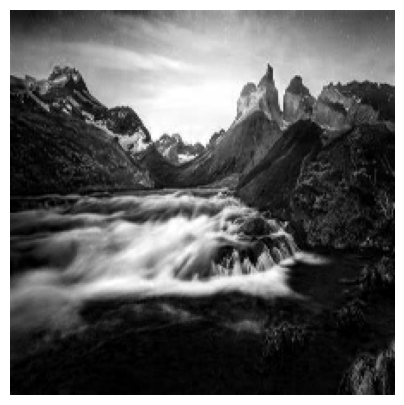

In [ ]:
plot(x)

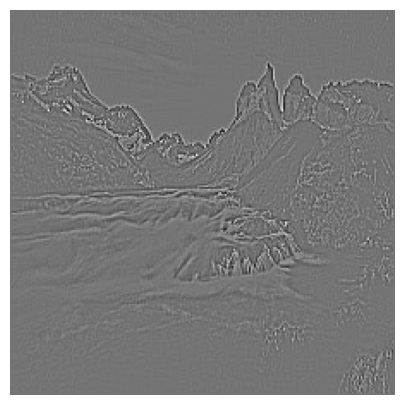

In [ ]:
plot(z)

In [ ]:
x

array([[0.07843137, 0.13333333, 0.0745098 , ..., 0.28235294, 0.27058824,
        0.29019608],
       [0.08627451, 0.11764706, 0.08235294, ..., 0.27843137, 0.26666667,
        0.28627451],
       [0.09803922, 0.10196078, 0.09411765, ..., 0.2745098 , 0.27058824,
        0.28235294],
       ...,
       [0.01176471, 0.01960784, 0.01960784, ..., 0.03921569, 0.02352941,
        0.02745098],
       [0.0627451 , 0.01568627, 0.02745098, ..., 0.03921569, 0.01568627,
        0.08235294],
       [0.08627451, 0.01568627, 0.03529412, ..., 0.03529412, 0.01568627,
        0.10980392]])

In [ ]:
np.random.random((3,3))

array([[0.77251769, 0.48245766, 0.38654179],
       [0.61021979, 0.20160149, 0.05844894],
       [0.19036527, 0.06507097, 0.6060956 ]])

In [ ]:
a = 2*np.random.random((3,3))-1

In [ ]:
a

array([[ 0.34643238,  0.72969284,  0.70571468],
       [-0.9785009 ,  0.23169192,  0.01458065],
       [ 0.91492652, -0.857326  ,  0.24639418]])

In [ ]:
a = np.random.random((3,3))

In [ ]:
a

array([[0.37486634, 0.06107862, 0.62117338],
       [0.44006938, 0.91502076, 0.94693516],
       [0.29368927, 0.80036952, 0.43287347]])

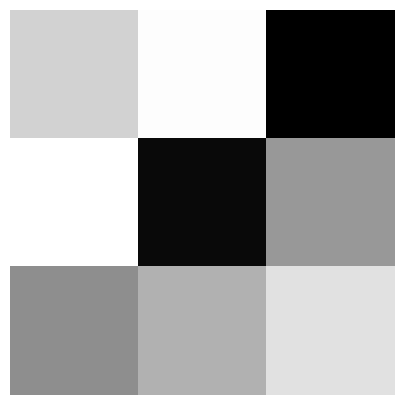

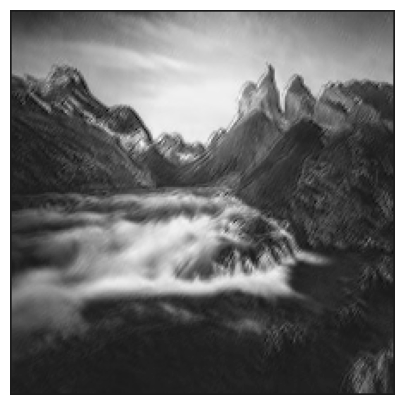

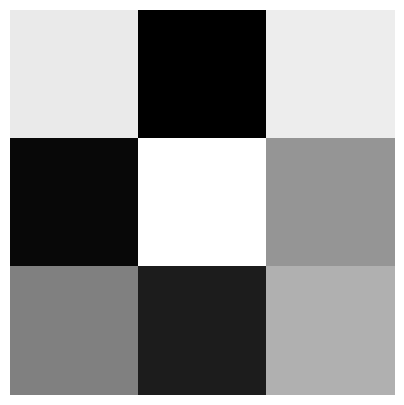

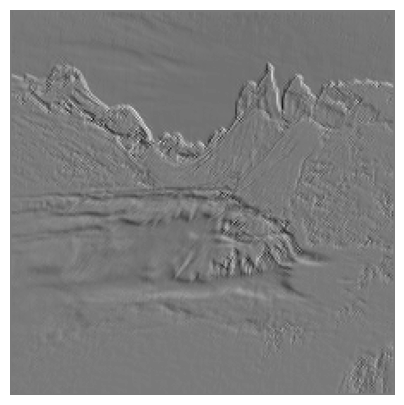

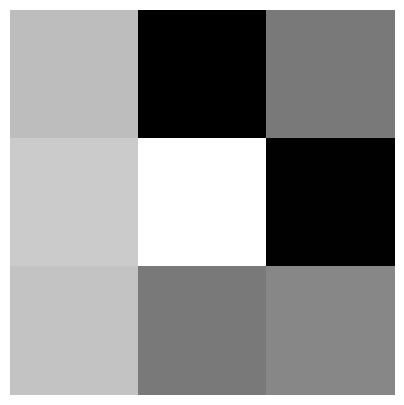

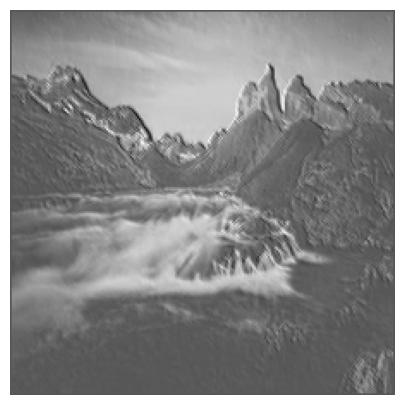

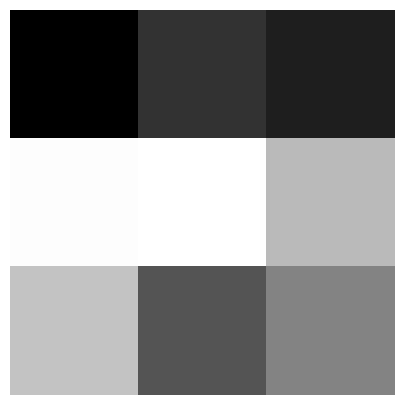

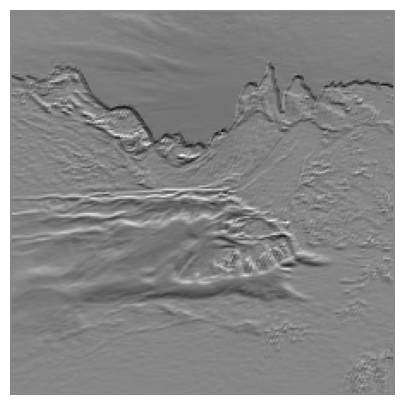

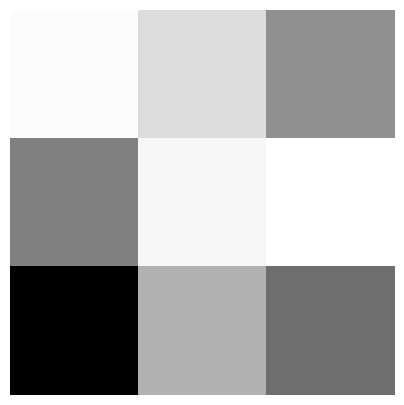

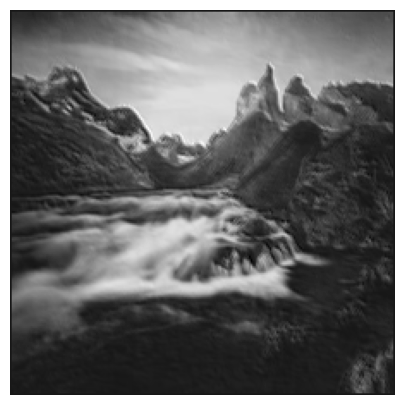

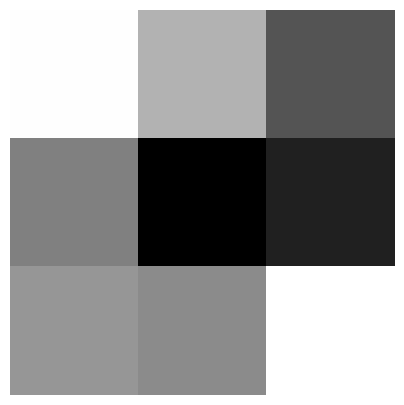

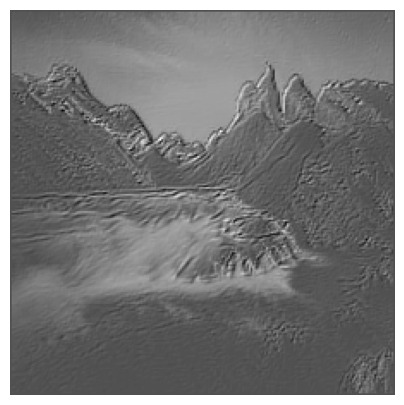

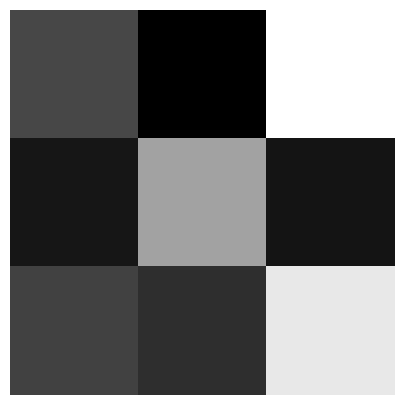

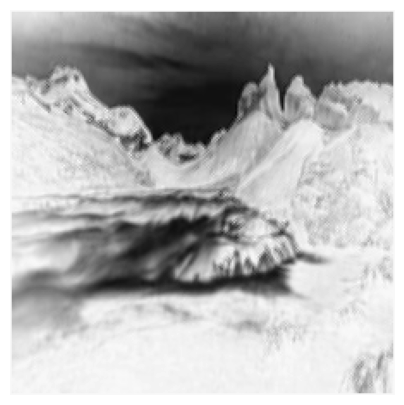

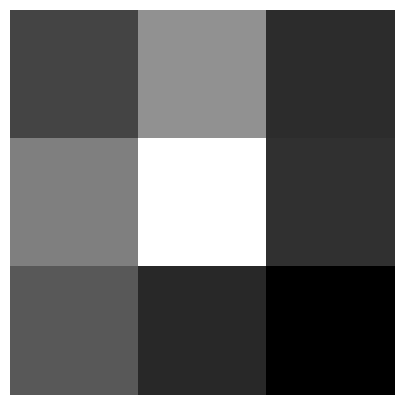

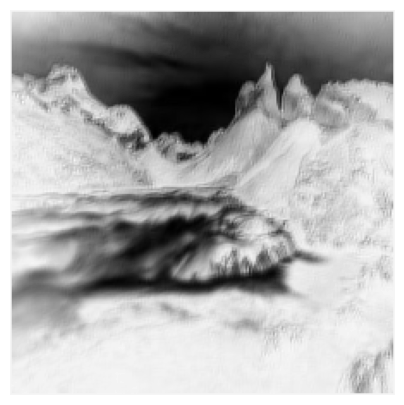

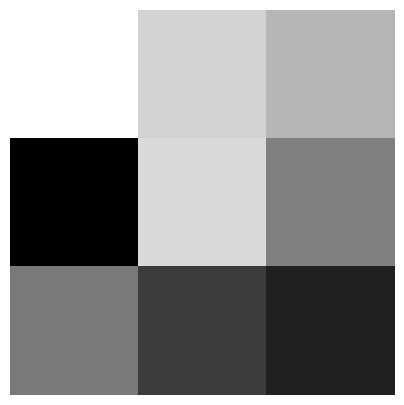

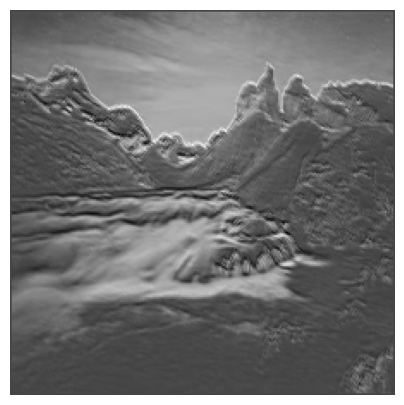

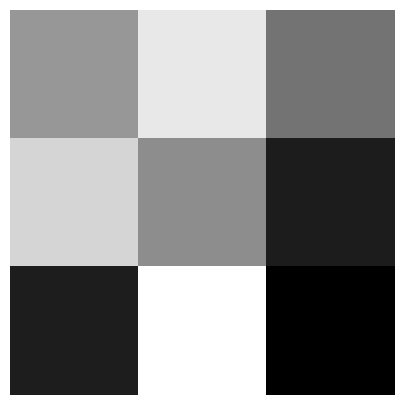

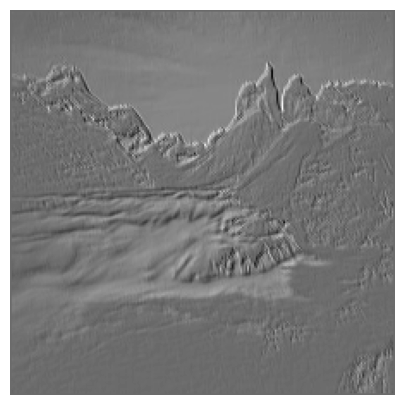

In [ ]:
for i in range(10):
    a = 2*np.random.random((3,3))-1
    plot(a)
    z=conv2(x,a)
    plot(z)